In [1]:
import numpy as np
import matplotlib.pylab as plt
import torch
from utils.data import FoodRecognitionDataset
from torch.utils.data import DataLoader

In [2]:
dataset = FoodRecognitionDataset("train")
len(dataset)

loading annotations into memory...
Done (t=3.99s)
creating index...
index created!


54392

In [3]:
def visualize(index):
    data_item = dataset[index]
    image = data_item["image"]
    text = data_item["text"]
    cat_id = data_item["cat_id"]
    heatmap = data_item["heatmap"]

    print("Shape of the image:", image.shape)
    print("Shape of the cat id:", cat_id.shape)
    print("Shape of the heatmap:", heatmap.shape)

    image = image.permute(1, 2, 0).numpy() * dataset.PIXEL_STD + dataset.PIXEL_MEAN
    image = image.astype(np.uint8)
    plt.imshow(image)
    plt.title(text)
    plt.show()

    for i in range(heatmap.shape[0]):
        plt.imshow(image)
        plt.imshow(heatmap[i], alpha=heatmap[i])
        plt.title(dataset.cat_names[cat_id[i].item()])
        plt.show()

23316
Shape of the image: torch.Size([3, 256, 256])
Shape of the cat id: torch.Size([5])
Shape of the heatmap: torch.Size([5, 256, 256])


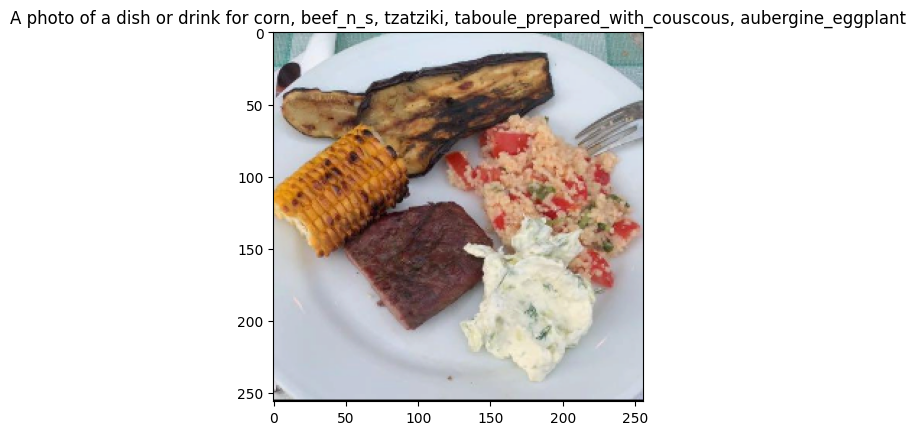

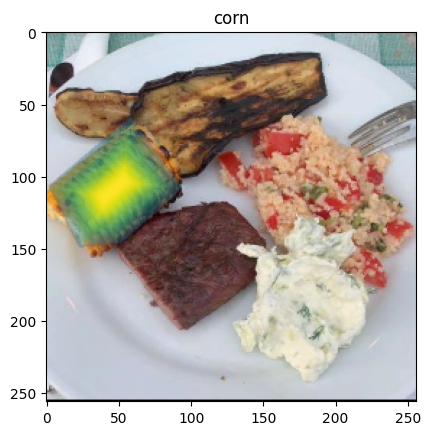

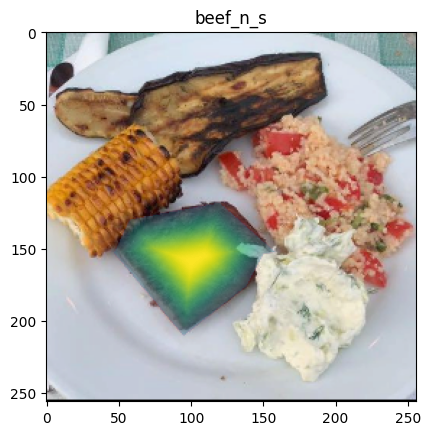

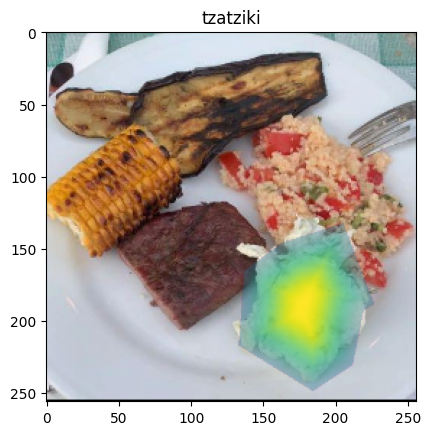

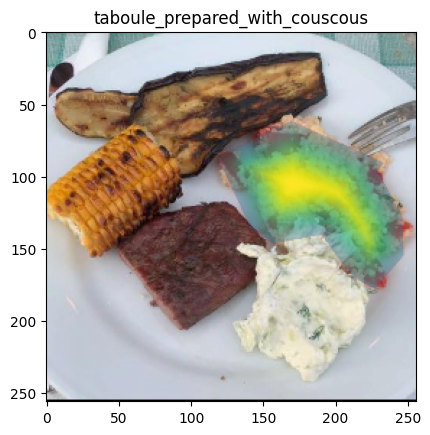

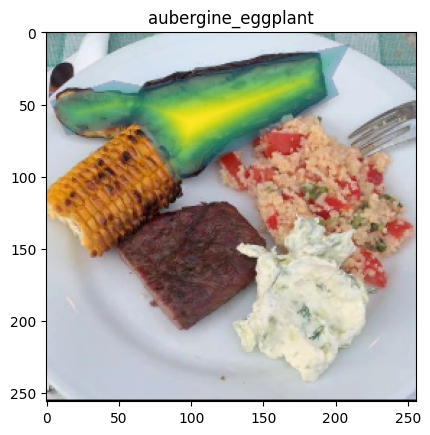

In [8]:
index = np.random.randint(len(dataset))
# index = 29711
print(index)
visualize(index)